# Proyecto Final

In [1]:
import os
import numpy as np #popular library for scientific computing
import nibabel as nib
import matplotlib #plotting library compatible with numpy
import matplotlib.pyplot as plt 
import skimage
from skimage import io
from skimage import filters
from nilearn import datasets
from nilearn import plotting


import scipy.ndimage.filters as filters
from numba import njit, prange

import modules

In [2]:
img1 = nib.load('/Users/gema/Analisis_imagen/bd_schizo/sub-01/anat/sub-01_T1w.nii.gz')

In [3]:
#resize
a = np.array(skimage.transform.resize(img1.dataobj, (120,160)))

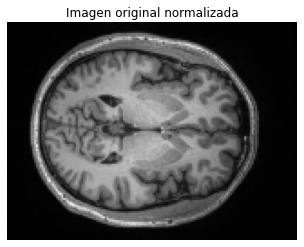

In [4]:
#normalizamos
img_gray= a[:,:,128]
#normalizo la imagen
img_o=img_gray
img_o=img_o/np.max(img_o)
plt.title('Imagen original normalizada'), plt.axis('off')
plt.imshow(img_o, cmap=plt.cm.gray)

In [5]:
#filtros suavizantes estándar??
def mean_filter(img,size_filter):

    # the filter is divided by size_filter^2 for normalization
    mean_filter = np.ones((size_filter,size_filter))/np.power(size_filter,2)
    # performing convolution
    img_meanfiltered = filters.convolve(img, mean_filter,mode='reflect')
    return img_meanfiltered


def median_filter(img, size):
    img_filtered = filters.median_filter(img,size = size,mode='reflect')
    return img_filtered

def gaussian_filter(img,sigma):
    # performing convolution
    img_gaussianfiltered = filters.gaussian_filter(img, sigma=sigma,mode='reflect')
    return img_gaussianfiltered


In [6]:
img_mean = mean_filter(img_o,2)
img_median = median_filter(img_o, 2)
img_gaussian_filter = gaussian_filter(img_o,0.75)

(Text(0.5, 1.0, 'Gaussian filtered image'), (-0.5, 159.5, 119.5, -0.5))

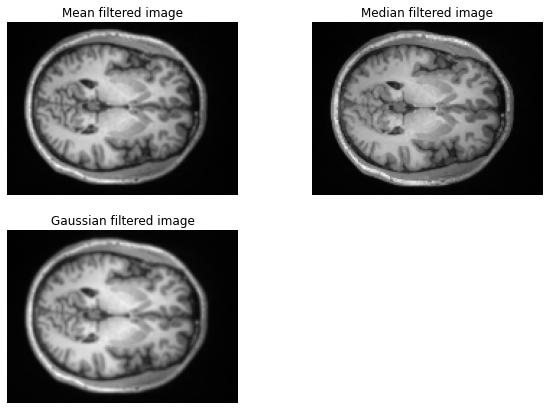

In [7]:
fig = plt.figure(figsize=(10,7))
plt.subplot(221)
plt.imshow(img_mean, cmap=plt.cm.gray)
plt.title('Mean filtered image'), plt.axis('off')
plt.subplot(222)
plt.imshow(img_median, cmap=plt.cm.gray)
plt.title('Median filtered image'), plt.axis('off')
plt.subplot(223)
plt.imshow(img_gaussian_filter, cmap=plt.cm.gray)
plt.title('Gaussian filtered image'), plt.axis('off')

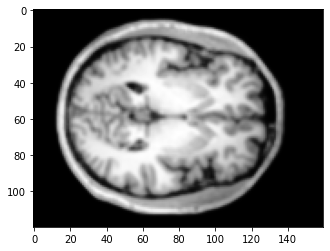

In [11]:
## NLM - CPP

#padding
img_pad = np.pad(img_o,1, mode='reflect')
#implementamos nlm
nlm_cpp = modules.nlm_cpp(img_o, img_pad,0.5, 2, 2)

plt.imshow(nlm_cpp, cmap=plt.cm.gray)